In [7]:
# Esercizio 1: Analizzo dati "mappa dei pub, circoli, locali in Italia"

# Importo pandas
import pandas as pd

# Inserisco il percorso del csv scaricato (uso doppi backslash altrimenti il singolo viene interpretato come carattere speciale)
file_path = 'C:\\Users\\alice\\Downloads\\Mappa-dei-pub-circoli-locali-in-Italia.csv'

# Il dataset non ha un encoding UTF-8 ma Latin1; inoltre il separatore non è una virgola, ma un punto e virgola.
# Dunque per leggerlo dovremo aggiungere i parametri encoding= e sep=

# Leggo il CSV con encoding latin1 e separatore punto e virgola
df = pd.read_csv(file_path, encoding='latin1', sep=';')

# Esercizi di esplorazione
# Quanti dati ci sono (righe e colonne)?

# Cerco il numero di righe e colonne con .shape
print("Dimensioni (righe, colonne):", df.shape)


Dimensioni (righe, colonne): (2635, 9)


In [8]:
# Cerco i metadati (nomi colonne)
# Mostra i nomi di tutte le colonne del DataFrame
print("Nomi colonne:", df.columns.tolist())


Nomi colonne: ['Comune', 'Provincia', 'Regione', 'Nome', 'Anno inserimento', 'Data e ora inserimento', 'Identificatore in OpenStreetMap', 'Longitudine', 'Latitudine']


In [9]:
# Stampo il primo elemento (prima riga)
print("Prima riga:\n", df.iloc[0])    # .iloc[0] mostra la riga all'indice zero (la prima)


Primo record:
 Comune                                            ALTRO
Provincia                                         ALTRO
Regione                                           ALTRO
Nome                                                NaN
Anno inserimento                                   2011
Data e ora inserimento             2011-06-25T23:17:43Z
Identificatore in OpenStreetMap              1339088150
Longitudine                                   13.733257
Latitudine                                     45.57583
Name: 0, dtype: object


In [10]:
# Stampo l'ultimo elemento (ultima riga)
print("Ultima riga:\n", df.iloc[-1])    # .iloc[-1] accede all'ultima riga


Ultima riga:
 Comune                                             TRANI
Provincia                          BARLETTA-ANDRIA-TRANI
Regione                                           Puglia
Nome                                        Well's Fargo
Anno inserimento                                    2009
Data e ora inserimento              2009-08-10T12:44:03Z
Identificatore in OpenStreetMap                387223648
Longitudine                                    16.436765
Latitudine                                     41.267264
Name: 2634, dtype: object


In [11]:
# Stampo un elemento a caso
print("Una riga a caso:\n", df.sample(1))    # .sample(1) restituisce una riga casuale

Una riga a caso:
      Comune                       Provincia    Regione            Nome  \
502  MILANO  CITTA' METROPOLITANA DI MILANO  Lombardia  Frizzi & Lazzi   

     Anno inserimento Data e ora inserimento  Identificatore in OpenStreetMap  \
502              2009   2009-11-08T20:42:54Z                        559731854   

     Longitudine  Latitudine  
502     9.178393   45.445554  


In [14]:
# Cerco gli anni di inserimento presenti
anni = df['Anno inserimento'].unique()    # Cerco i valori unici della colonna 'Anno inserimento'
print("Anni presenti:", sorted(anni))


Anni presenti: [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [15]:
# Cerco le attività nel quadrato di longitudine 9–10 e latitudine 45–46
masking_quadrato = (
    (df['Longitudine'] >= 9) & (df['Longitudine'] <= 10) &
    (df['Latitudine'] >= 45) & (df['Latitudine'] <= 46)    # Creo un masking filtrando secondo i range indicati
)
df_quadrato = df[masking_quadrato]    # Salvo il masking in una variabile
print("Numero attività nel quadrato:", len(df_quadrato))    # Uso len() per trovare il numero di attività nel masking


Numero attività nel quadrato: 306


In [16]:
# Cerco le attività nella provincia di Vicenza
df_vicenza = df[df['Provincia'].str.contains('Vicenza', case=False, na=False)]    # Uso contains per trovare tutti i valori che contengono 'Vicenza'
                                                                                  # 'case=False' ignora maiusc/minusc; 'na=False' serve per non andare
                                                                                  # in errore se ci sono valori mananti (NaN) nella colonna
print("Numero attività a Vicenza:", len(df_vicenza))    # Uso len() per trovare il numero di attività

Numero attività a Vicenza: 73


In [17]:
# Cerco numero e nome delle enoteche
df_enoteche = df[df['Nome'].str.contains('enoteca', case=False, na=False)]    # Filtro le righe che contengono la parola "enoteca" nel 'Nome' dell'attività

print("Totale enoteche:", len(df_enoteche))    # Conto le enoteche

print("Nomi delle enoteche:")
print(df_enoteche['Nome'].unique())    # Cerco i nomi delle enoteche


Totale enoteche: 6
Nomi delle enoteche:
['Enoteca con Cucina""Tirolin""' 'Concordia Enoteca' 'Enoteca Umberto'
 'Enoteca ""Al Brindisi""' 'Enoteca ""da Massimo""'
 'Enoteca Il Violino Rosso']


In [18]:
# Cerco numero di attività in Lazio e Abruzzo
df_regioni = df[df['Regione'].isin(['Lazio', 'Abruzzo'])]    # Filtro in base alla colonna 'Regione'
print("Totale attività (Lazio + Abruzzo):", len(df_regioni))    # Uso len() per trovare numero attività


Totale attività (Lazio + Abruzzo): 337


In [20]:
# Esercizio 2: Analizzo dati su caratteristiche e abitudini delle persone rispetto ai costi individuali per le cure mediche
#come premio per le assicurazioni sulla salute.

# Importo pandas
import pandas as pd

# Inserisco il csv scaricato e lo adatto come DataFrame per Pandas
df = pd.read_csv('C:\\Users\\alice\\Downloads\\insurance.csv')

# Visualizzo num righe e colonne, le prime 5 righe e i nomi delle colonne
print("Dimensioni:", df.shape)    #Cerco numero di righe e colonne con .shape

print("Anteprima:")
print(df.head())    # Cerco prime 5 righe

print("Nomi colonne:", df.columns.tolist())    # Cerco nomi delle colonne



Dimensioni: (1338, 7)
Anteprima:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Nomi colonne: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [26]:
# Cerco le medie di 'charges' rispetto a 'region'
media_per_regione = df.groupby('region')['charges'].mean()    # Calcolo la media dei costi per ciascuna regione (groupby + mean)
print("Media costi per regione:")
print(media_per_regione)


Media costi per regione:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


In [22]:
# Cerco le medie di 'charges' rispetto a 'smoker' o 'sex'
media_per_fumatore = df.groupby('smoker')['charges'].mean()    # Calcolo la media dei costi per fumatori / non fumatori
print("Media costi per fumatore:")
print(media_per_fumatore)

media_per_sesso = df.groupby('sex')['charges'].mean()    # Calcolo la media dei costi per sesso
print("Media costi per sesso:")
print(media_per_sesso)


Media costi per fumatore:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
Media costi per sesso:
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


In [23]:
# Cerco statistiche del 'bmi' (indice di massa corporea)
print("Statistiche BMI:")
print(df['bmi'].describe())    # Con describe trovo conteggio, media, deviazione standard, minimo, quartili e massimo


Statistiche BMI:
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


In [25]:
# Cerco minimo, media e massimo di 'charges' rispetto ai quartili di 'bmi'
df['bmi_quartile'] = pd.qcut(df['bmi'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])    # Creo una colonna 'bmi_quartile' suddividendo bmi in 4 fasce (quartili)

stats_by_quartile = df.groupby('bmi_quartile')['charges'].agg(['min', 'mean', 'max'])    # Raggruppo per quartile e calcolo statistiche su 'charges'
print("Statistiche costi per quartile BMI:")
print(stats_by_quartile)


Statistiche costi per quartile BMI:
                    min          mean          max
bmi_quartile                                      
Q1            1121.8739  10360.662825  38245.59327
Q2            1131.5066  11407.831468  62592.87309
Q3            1135.9407  14358.173081  60021.39897
Q4            1141.4451  16987.936691  63770.42801


C:\Users\alice\AppData\Local\Temp\ipykernel_7460\61803664.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_quartile = df.groupby('bmi_quartile')['charges'].agg(['min', 'mean', 'max'])    # Raggruppo per quartile e calcolo statistiche su 'charges'


In [54]:
# Esercizio 3: Analizzo dati del dataset 'iris'

import pandas as pd    # Importo pandas

df = pd.read_csv('C:\\Users\\alice\\Downloads\\iris.csv', header=None)    # Importo csv ma specifico io i nomi delle colonne, perché header=0 mi dà la prima riga
df.columns = ['lungh_sepalo', 'largh_sepalo', 'lungh_petali', 'largh_petali', 'specie']    # Do i nomi alle colonne manualmente

# Calcolo la media della lunghezza dei petali del dataset
media_lungh_petali = (df['lungh_petali'].mean())

print("Media lunghezza petali di tutto il df:")
print(round(media_lungh_petali, 2))    #Arrotondo a due cifre decimali

Media lunghezza petali di tutto il df:
3.76


In [51]:
# Calcolo la media della lunghezza dei petali per specie
media_lungh_petali_per_specie = df.groupby('specie')['lungh_petali'].agg(['mean'])

print("Media lunghezza petali per specie:")
print(round(media_lungh_petali_per_specie, 2))     #Arrotondo a due cifre decimali

Media lunghezza petali per specie:
                 mean
specie               
Iris-setosa      1.46
Iris-versicolor  4.26
Iris-virginica   5.55


In [52]:
# Calcolo media, minimo e massimo della larghezza dei sepali per ogni specie, utilizzando .groupby() e .agg()
stat_largh_sepalo_per_specie = df.groupby('specie')['largh_sepalo'].agg(['min', 'mean', 'max']) 

print("Statistiche larghezza sepalo per specie:")
print(round(stat_largh_sepalo_per_specie, 2))     #Arrotondo a due cifre decimali

Statistiche larghezza sepalo per specie:
                 min  mean  max
specie                         
Iris-setosa      2.3  3.42  4.4
Iris-versicolor  2.0  2.77  3.4
Iris-virginica   2.2  2.97  3.8


In [66]:
# Esercizio 3: Analizzo dati del dataset 'wine'

import pandas as pd    #Importo pandas
df = pd.read_csv('C:\\Users\\alice\\Downloads\\vini.csv')    #Importo csv
print(df.head())    # Mostro prime righe
print("Nomi colonne:", df.columns.tolist())    # Mostro nomi colonne

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [64]:
# Cerco la media della concentrazione alcolica per ogni qualità ('alcohol' per 'quality')
media_alcol_per_vino = df.groupby('quality')['alcohol'].agg('mean')

print("Media alcol per qualità di vino:")
print(round(media_alcol_per_vino, 2))


Media alcol per qualità di vino:
quality
3    10.22
4    10.18
5     9.84
6    10.59
7    11.39
8    11.68
9    12.18
Name: alcohol, dtype: float64


In [68]:
# Cerco differenze nella concentrazione alcolica tra vini rossi e bianchi ('alcohol' per 'type')
media_alcol_per_colore = df.groupby('type')['alcohol'].agg('mean')

print("Media alcol vini rossi:")
print(round(media_alcol_per_colore, 2))

Media alcol vini rossi:
type
red      10.42
white    10.51
Name: alcohol, dtype: float64


In [69]:
# Cerco la media della concentrazione alcolica per ogni pH ('alcohol' per 'pH')
media_alcol_ph= df.groupby('pH')['alcohol'].agg('mean')

print("Media alcol per pH:")
print(round(media_alcol_ph, 2))

Media alcol per pH:
pH
2.72     9.70
2.74    10.10
2.77     9.40
2.79    10.37
2.80    11.20
        ...  
3.81    10.30
3.82    10.50
3.85    12.90
3.90    12.95
4.01    12.50
Name: alcohol, Length: 108, dtype: float64


In [70]:
# Cerco la media della concentrazione alcolica per ogni solfato ('alcohol' per 'sulphates')
media_alcol_solfato= df.groupby('sulphates')['alcohol'].agg('mean')

print("Media alcol per solfato:")
print(round(media_alcol_solfato, 2))

Media alcol per solfato:
sulphates
0.22    13.40
0.23    12.20
0.25    11.80
0.26    12.42
0.27    12.33
        ...  
1.61     9.50
1.62     9.50
1.95     9.90
1.98     9.80
2.00     9.40
Name: alcohol, Length: 111, dtype: float64


In [71]:
#Esercizio: Analizzo dati del dataset 'Boston'
import pandas as pd
df = pd.read_csv('C:\\Users\\alice\\Downloads\\Boston.csv')
print(df.head())
print('Nomi colonne: ', df.columns.tolist())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  
Nomi colonne:  ['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


In [75]:
# Controllo se la media del prezzo delle case ('medv') cambia a seconda della distanza dal fiume Charles ('chas', 0=lontano, 1=vicino)
media_prezzo_case = df.groupby('chas')['medv'].agg('mean')

print('Media del prezzo delle case in base alla vicinanza al fiume Charles:')
print(round(media_prezzo_case, 2))

Media del prezzo delle case in base alla vicinanza al fiume Charles:
chas
0    22.09
1    28.44
Name: medv, dtype: float64


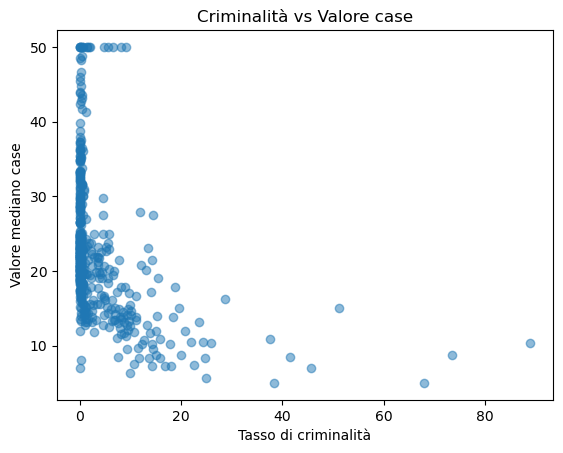

In [77]:
# Cerco correlazioni tra tasso di criminalità ('crim') e valore delle abitazioni ('medv')
import matplotlib.pyplot as plt    #Importo grafico scatterplot

plt.scatter(df['crim'], df['medv'], alpha=0.5)    # Creo il grafico (alpha=0.5 serve per vedere meglio i punti)
plt.title('Criminalità vs Valore case')    # Titolo del grafico
plt.xlabel('Tasso di criminalità')    # Titolo asse X
plt.ylabel('Valore mediano case')    # Titolo asse Y
plt.show()    # Mostro il grafico



In [87]:
# Calcolo la media del numero delle stanze ('rm') rispetto al rapporto allunni-insegnanti ('ptratio')
rm_per_ptratio = df.groupby('ptratio')['rm'].agg('mean')

print('Rapporto numero studenti/numero delle stanze')
print(round(rm_per_ptratio, 2))

#Scopriamo che il numero di studenti aumenta al diminuire delle stanze.

Rapporto numero studenti/numero delle stanze
ptratio
12.6    7.22
13.0    7.41
13.6    7.92
14.4    7.88
14.7    6.25
14.8    6.75
14.9    7.31
15.1    6.82
15.2    6.42
15.3    6.71
15.5    7.24
15.6    6.70
15.9    7.00
16.0    6.23
16.1    6.43
16.4    6.14
16.6    6.34
16.8    6.15
16.9    6.02
17.0    6.87
17.3    6.38
17.4    7.21
17.6    6.82
17.8    6.50
17.9    6.13
18.0    7.22
18.2    6.28
18.3    6.52
18.4    6.29
18.5    6.29
18.6    6.11
18.7    6.41
18.8    5.96
18.9    5.79
19.0    6.45
19.1    6.23
19.2    6.05
19.6    6.22
19.7    6.30
20.1    5.59
20.2    6.02
20.9    6.27
21.0    6.04
21.1    5.89
21.2    6.03
22.0    5.80
Name: rm, dtype: float64


In [88]:
# Calcolo la media del numero delle stanze ('rm') rispetto al valore delle case ('medv')
rm_per_medv = df.groupby('medv')['rm'].agg('mean')

print('Rapporto valore delle case/numero di stanze:')
print(round(rm_per_medv, 2))

#Scopriamo che il valore delle case aumenta all'aumentare delle stanze.

Rapporto valore delle case/numero di stanze:
medv
5.0     5.57
5.6     5.99
6.3     5.85
7.0     4.97
7.2     6.02
        ... 
46.7    7.69
48.3    8.25
48.5    7.85
48.8    8.40
50.0    7.48
Name: rm, Length: 229, dtype: float64


In [89]:
# Calcolo la media dell'età delle case ('age') rispetto all'accessibilità alle autostrade ('rad', più è alto e più è accessibile)
eta_per_rad = df.groupby('rad')['age'].agg('mean')

print('Rapporto accessibilità alle autostrade/età delle case:')
print(round(eta_per_rad, 2))

# Scopriamo che alcune zone con maggiore accessibilità alle autostrade hanno case vecchie

Rapporto accessibilità alle autostrade/età delle case:
rad
1     45.02
2     64.77
3     49.31
4     60.84
5     69.22
6     60.14
7     40.14
8     67.35
24    89.81
Name: age, dtype: float64


In [91]:
# Calcolo la media dell'età delle case ('age') rispetto al numero di stanze ('rm')
eta_per_rm = df.groupby('rm')['age'].agg('mean')

print('Rapporto numero stanze/età delle case:')
print(round(eta_per_rm, 2))

# Scopriamo che non c'è molta differenza nel numero delle stanze tra case più vecchie e case più nuove.

Rapporto numero stanze/età delle case:
rm
3.561     87.9
3.863    100.0
4.138    100.0
4.368     91.2
4.519    100.0
         ...  
8.375     93.9
8.398     91.5
8.704     86.9
8.725     83.0
8.780     82.9
Name: age, Length: 446, dtype: float64


In [92]:
# Calcolo la media dell'età delle case ('age') rispetto alle tasse sulle case ('tax')
eta_per_tax = df.groupby('tax')['age'].agg('mean')

print('Rapporto tasse sulle case/età delle case:')
print(round(eta_per_tax, 2))

Rapporto tasse sulle case/età delle case:
tax
187    36.10
188    89.07
193    75.49
198    24.80
216    48.62
       ...  
432    81.74
437    97.17
469    47.60
666    89.81
711    94.26
Name: age, Length: 66, dtype: float64
